# Data and Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Analysing the data

In [4]:
# Summary Statistics
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


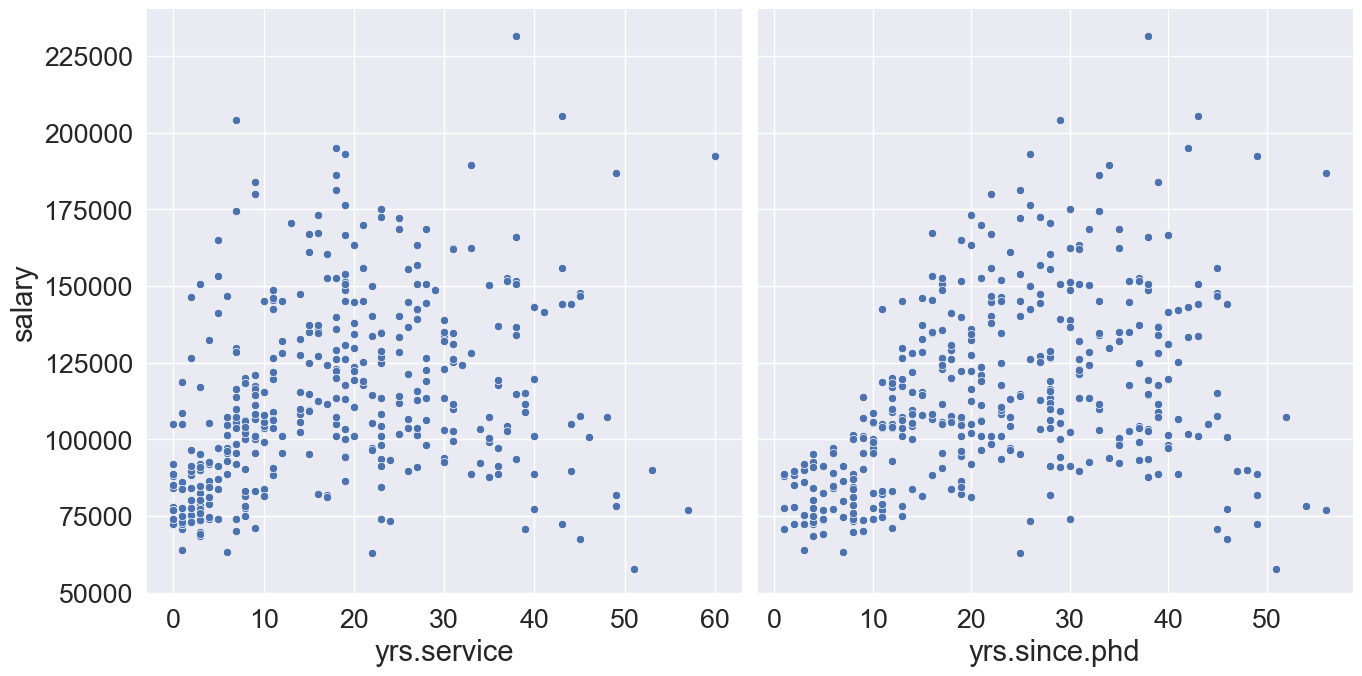

In [5]:
# plotting continuous Independant Variable against dependant variable
sns.set(font_scale=1.75)
sns.pairplot(data = df, y_vars=['salary'], x_vars=['yrs.service', 'yrs.since.phd'], height = 7)

<AxesSubplot:>

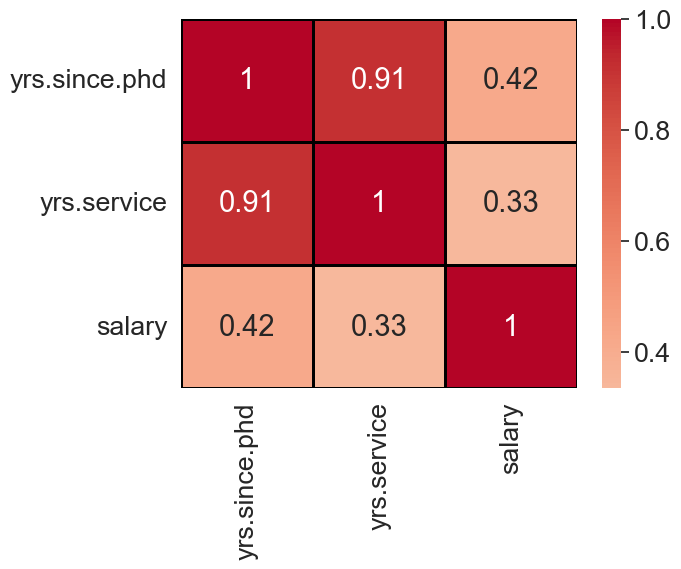

In [6]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True, fmt='.2g', center=0, cmap="coolwarm", linewidths=1, linecolor='black')

In [7]:
# Categorical Variables
df['rank'].value_counts()
df.select_dtypes(include='object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [8]:
# For loop categorical variables
categorical = list(df.select_dtypes(include='object'))
for cat in categorical:
    print(df[cat].value_counts())


Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [9]:
# Data set reminder
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [10]:
# Transform objects into dummies
df = pd.get_dummies(data = df, drop_first=True)
df.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


# Multilinear Regression preparation

In [11]:
# isolate X and y
y = df.salary / 1000
X = df.drop(columns=['salary', 'yrs.service'])
X.head()

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1
1,20,0,1,1,1
2,4,1,0,1,1
3,45,0,1,1,1
4,40,0,1,1,1


In [12]:
# Add a constant
X = sm.add_constant(X)
X

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1
...,...,...,...,...,...,...
392,1.0,33,0,1,0,1
393,1.0,31,0,1,0,1
394,1.0,42,0,1,0,1
395,1.0,25,0,1,0,1


In [13]:
# Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1502)

X_train.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1
326,1.0,23,0,1,1,1
15,1.0,12,0,1,1,1
354,1.0,8,1,0,1,1


# Multilinear Regression

In [14]:
# Multilinear Regression
model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.65e-41
Time:                        12:09:03   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

# Accuracy Assesment

In [15]:
# Predict 
preds = model1.predict(X_test)
preds[:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [16]:
# Accuracy Assemsment
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("MAE:",  round(mean_absolute_error(y_test, preds),1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, preds)),1))

MAE: 18.2
RMSE: 25.8


# Challenge 
### Using Multilinear Regresion to Study a Store Sales' drivers
 * Task 1: Pick Variables for model
 * Task 2: Analyze Data i.e Summary Statistics
 * Task 3: Correlation Matrix
 * Task 4: Create a Training and Test set
 * Task 5: Use Multilinear Regression
 * Task 6: Asses Accuracy


In [17]:
# Import data
data = pd.read_csv('Clothing.csv')
data.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [18]:
data.tsales = data.tsales/1000
data.sales = data.sales/1000
data.inv1 = data.inv1/1000
data.inv2 = data.inv2/1000
data.describe()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,833.584213,6.334751,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,58.257255,27.829217,151.050000,42.808462
std,583.463838,3.739344,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,107.558771,41.501943,112.498254,13.296070
min,50.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000,0.350000,16.000000,16.000000
25%,495.340000,3.904200,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,20.000000,10.000000,80.000000,37.000000
50%,694.227000,5.278935,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,22.207040,22.859850,120.000000,40.000000
75%,976.817000,7.739899,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,62.269230,22.859850,190.000000,42.000000
max,5000.000000,27.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1500.000000,400.000000,1214.000000,90.000000


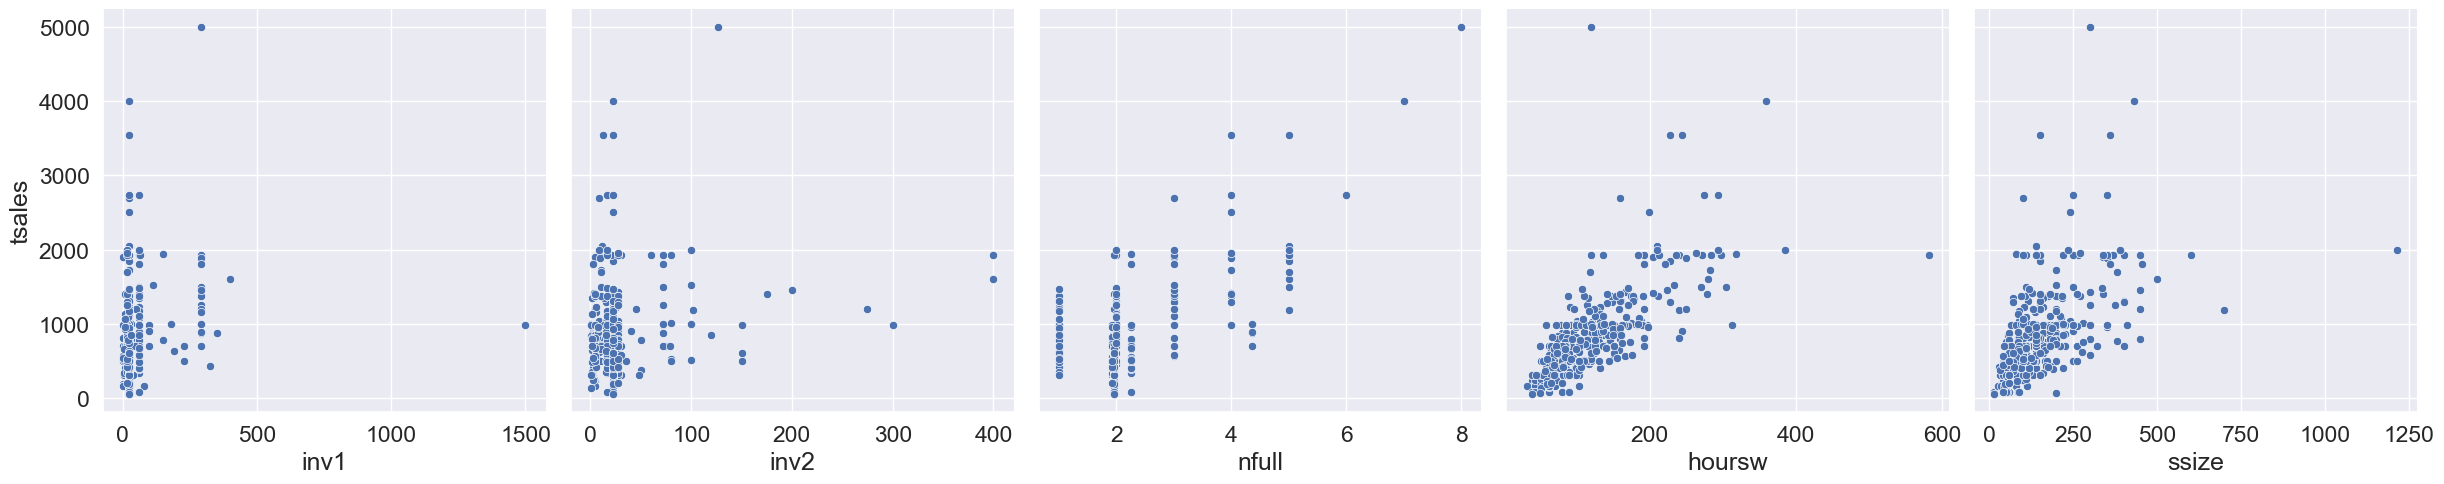

In [19]:
sns.set(font_scale=1.5)
sns.pairplot(data= data, y_vars=['tsales'], x_vars=['inv1', 'inv2', 'nfull', 'hoursw', 'ssize'], height=5)

<AxesSubplot:>

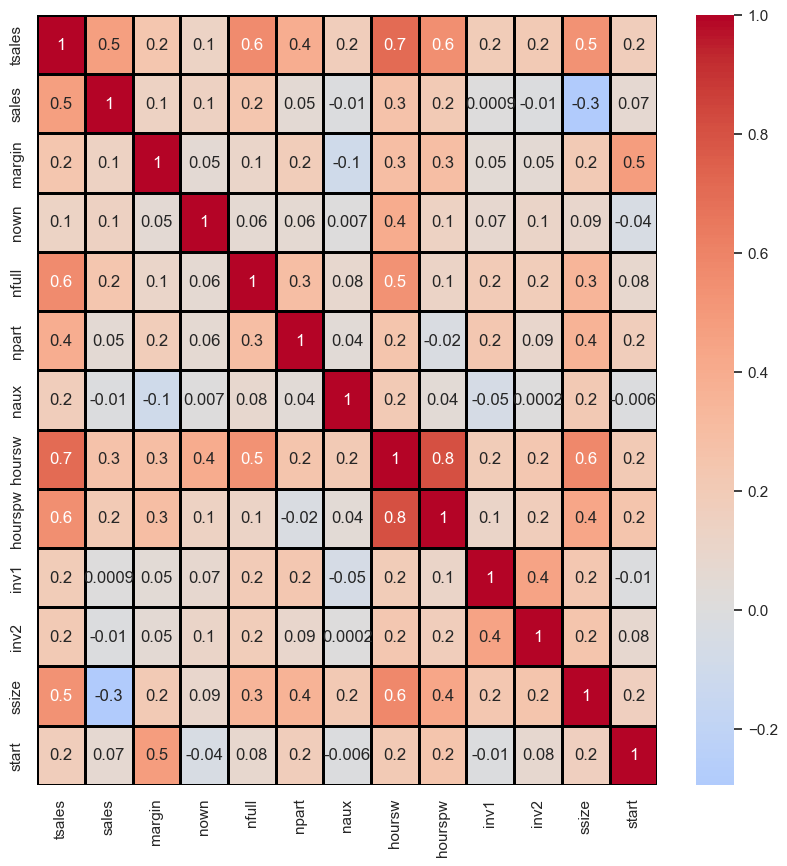

In [47]:
# Correlation Matrix
sns.set(rc = {'figure.figsize':(10, 10)}, font_scale=1)
sns.heatmap(data=data.corr(), annot = True, fmt='.1g', center=0, cmap='coolwarm',linewidths=1, linecolor='black' )

#### Dependant variables to be used: nfull, hourspw, margin, inv2, ssize

# Multilinear Preparation

In [44]:
y = data.tsales
X = data.drop(columns=['tsales', 'sales', 'nfull', 'npart', 'naux', 'hoursw', 'hourspw'])
X = sm.add_constant(X)
X.head(2)


,const,margin,nown,inv1,inv2,ssize,start
0,1.0,41.0,1.0,17.16667,27.17704,170,41.0
1,1.0,39.0,2.0,17.16667,27.17704,450,39.0


In [45]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1502)
X_train.head(2)

,const,margin,nown,inv1,inv2,ssize,start
201,1.0,42.0,3.0,22.20704,400.0,400,42.0
25,1.0,35.0,1.0,62.26923,20.0,160,35.0


# Multilinear Regression


In [46]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     23.57
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           5.64e-23
Time:                        12:20:35   Log-Likelihood:                -2424.6
No. Observations:                 320   AIC:                             4863.
Df Residuals:                     313   BIC:                             4890.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.9418    207.403     -0.843      0.4

# Accuracy Assesment

In [48]:
preds = model.predict(X_test)

In [49]:
print("MAE:",  round(mean_absolute_error(y_test, preds),1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, preds)),1))

MAE: 346.9
RMSE: 529.0
